<a href="https://colab.research.google.com/github/vishnucipher/wine-quality-prediction/blob/master/wine-quality-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project Overview

<p>
Welcome to our Wine Quality Prediction project! We're using smart computer techniques to guess how good a wine might be. We collected lots of information about different wines from a place called Kaggle. Then, we looked at this info really closely, figuring out the important bits that help predict wine quality.
After that, we used some super cool math tricks to create a smart program (we call it a model) that can predict wine quality accurately. Now, anyone can use our project to quickly find out if a wine is awesome or just okay. It's like having a personal wine quality expert at your fingertips! Cheers to predicting great wines! 🍷🤖</p>




**STEPS**
- Data Collection [kaggle](https://www.kaggle.com/datasets/rajyellow46/wine-quality?rvi=1)
- Feature Engineering
- Featue Scaling
- Model Creation
- Evolution of Model

#### Attribute Information:


Input variables (based on physicochemical tests):

1.fixed acidity
2.volatile acidity
3.citric acid
4.residual sugar
5.chlorides
6.free sulfur dioxide
7.total sulfur dioxide
8.density
9.pH
10.sulphates
11.alcohol

12.  quality (score between 0 and 10) Output variable (based on sensory data):


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/wine/data/winequalityN.csv')


#### Exploratary Data Analysis

In [ ]:
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['type']=label.fit_transform(df['type']) #white=1,red=0

In [ ]:
## info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [ ]:
## size of the dataframe
df.shape

(6497, 13)

In [ ]:
## duplicated rows
df.duplicated().any()

True

In [ ]:
## droping druplicate
df.drop_duplicates(inplace=True)

In [ ]:
df.shape ## shape of df after removing the dataset

(5329, 13)

In [ ]:
## Missing values
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

<Axes: >

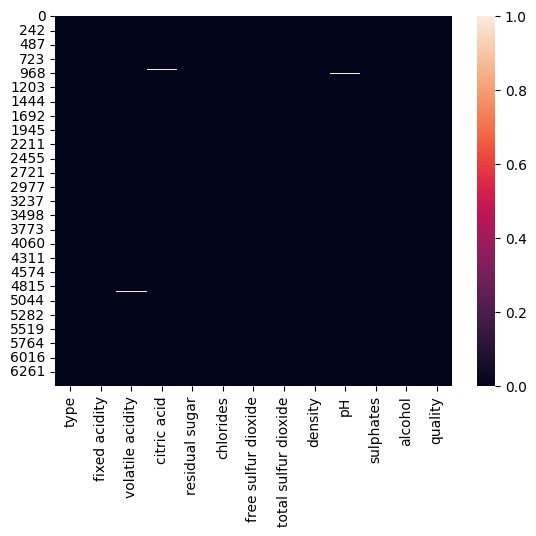

In [ ]:
sns.heatmap(df.isnull())

- columns are fixed acidity,volatile acidity,citric acide,residual sugar,chlorides,pH,sulphates are have the some of null values init

### Handling Missing Values

In [ ]:
## missing columns
columns_having_missing ={}
for column in df.columns:
    if df[column].isnull().sum() > 0:
        columns_having_missing[column] = df[column].isnull().sum()
print(columns_having_missing)

{'fixed acidity': 10, 'volatile acidity': 8, 'citric acid': 3, 'residual sugar': 2, 'chlorides': 2, 'pH': 9, 'sulphates': 4}


#### histplots before filling the miss values in columns

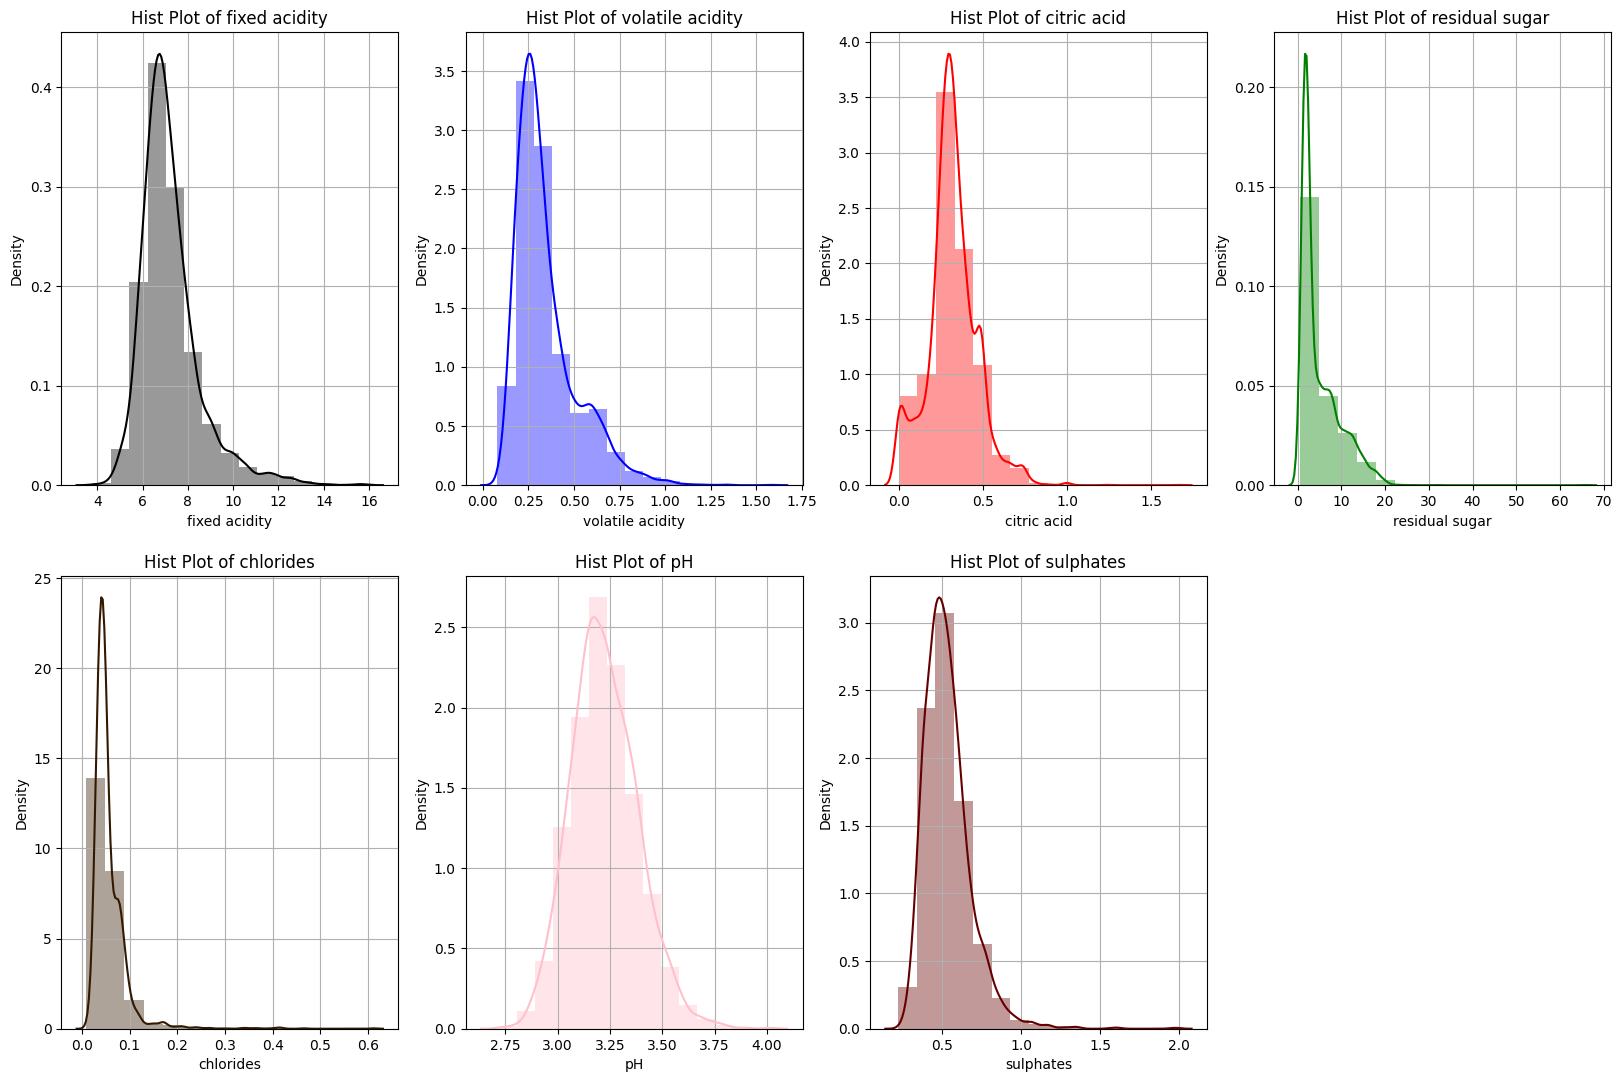

In [ ]:
## histplots before filling the miss values in columns
pt.figure(figsize=(20, 20))
color = ['k','b','r','g','#331900','pink','#660000']
for i, feature in enumerate(list(columns_having_missing.keys())):
    pt.subplot(3,4 ,i + 1)
    sns.distplot(df[feature],color=color[i],bins=15)
    pt.grid(axis='both')
    pt.title(f'Hist Plot of {feature}')

In [ ]:
##Filling the missing values with its column's mean
for feature in columns_having_missing.keys():
    df[feature].fillna(df[feature].mean(),inplace=True)

#### histplots after filling the miss values in columns

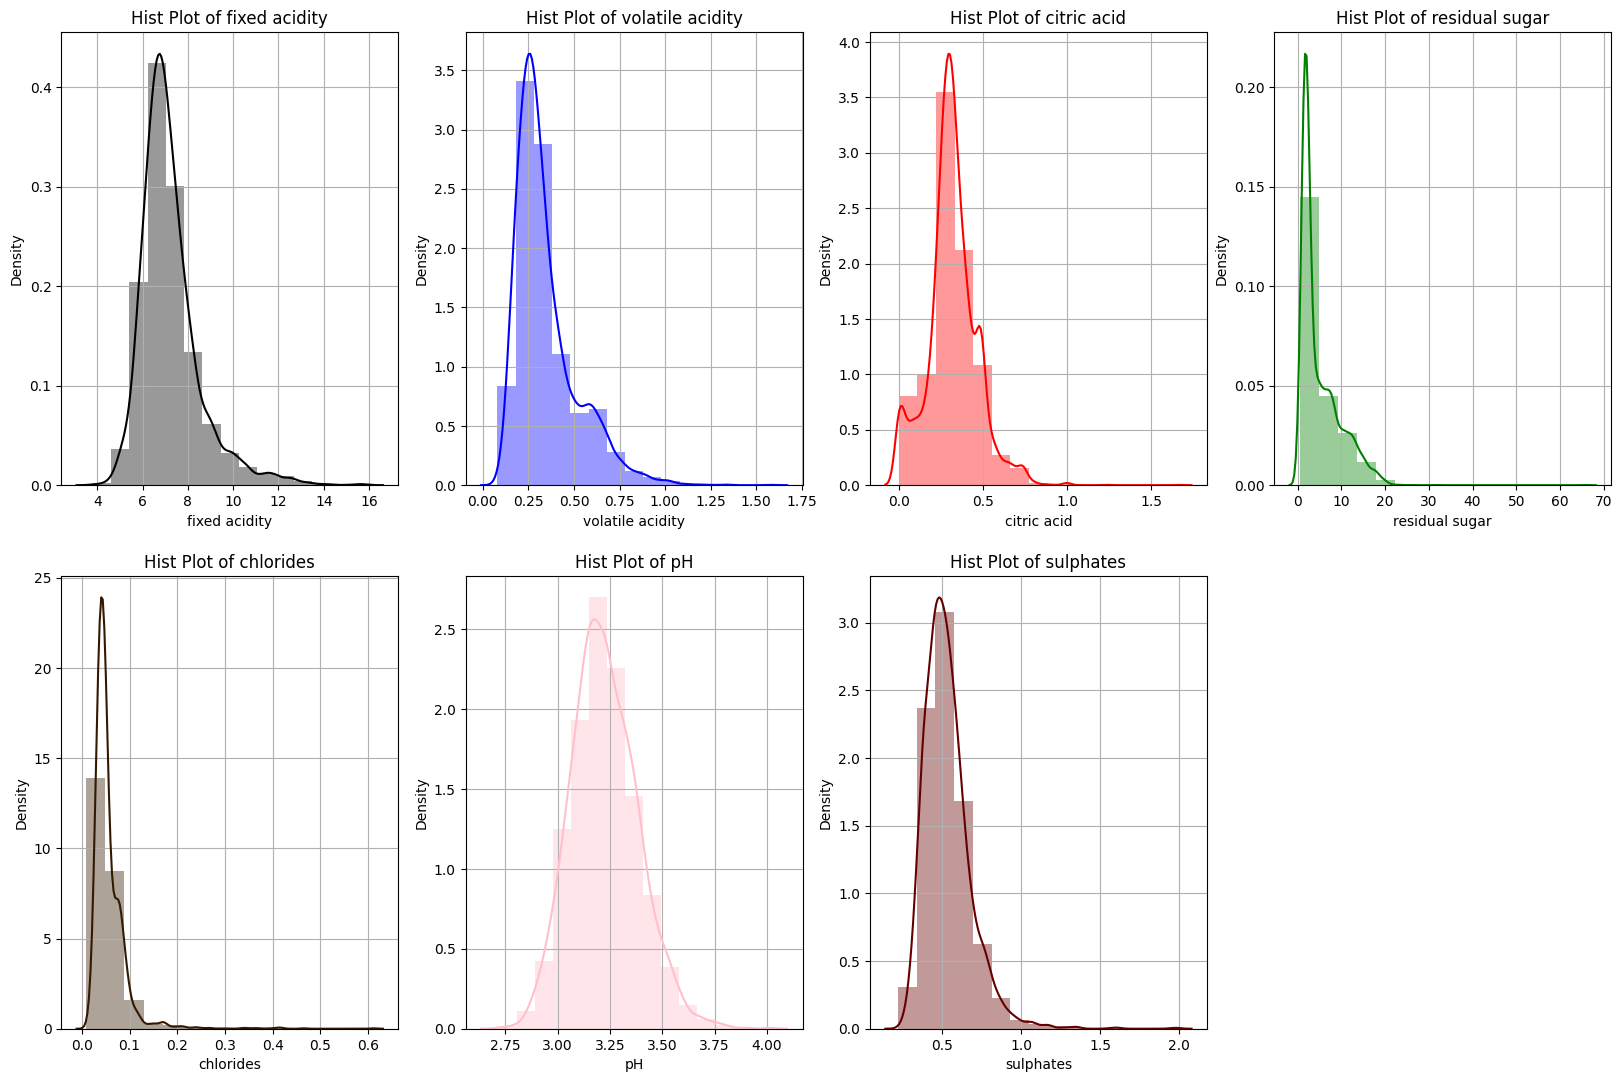

In [ ]:
## seeing the distribution after filling the histplots
pt.figure(figsize=(20, 20))
color = ['k','b','r','g','#331900','pink','#660000']
for i, feature in enumerate(list(columns_having_missing.keys())):
    pt.subplot(3,4 ,i + 1)
    sns.distplot(df[feature],color=color[i],bins=15)
    pt.grid(axis='both')
    pt.title(f'Hist Plot of {feature}')

<Axes: >

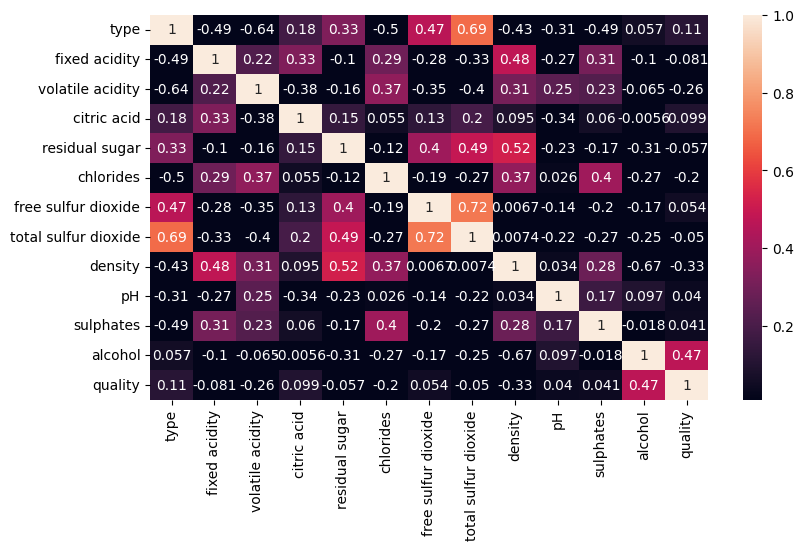

In [ ]:
## corrlation matrxi
pt.figure(figsize=(9,5))
sns.heatmap(df.corr(),annot=True,vmin=0.01)

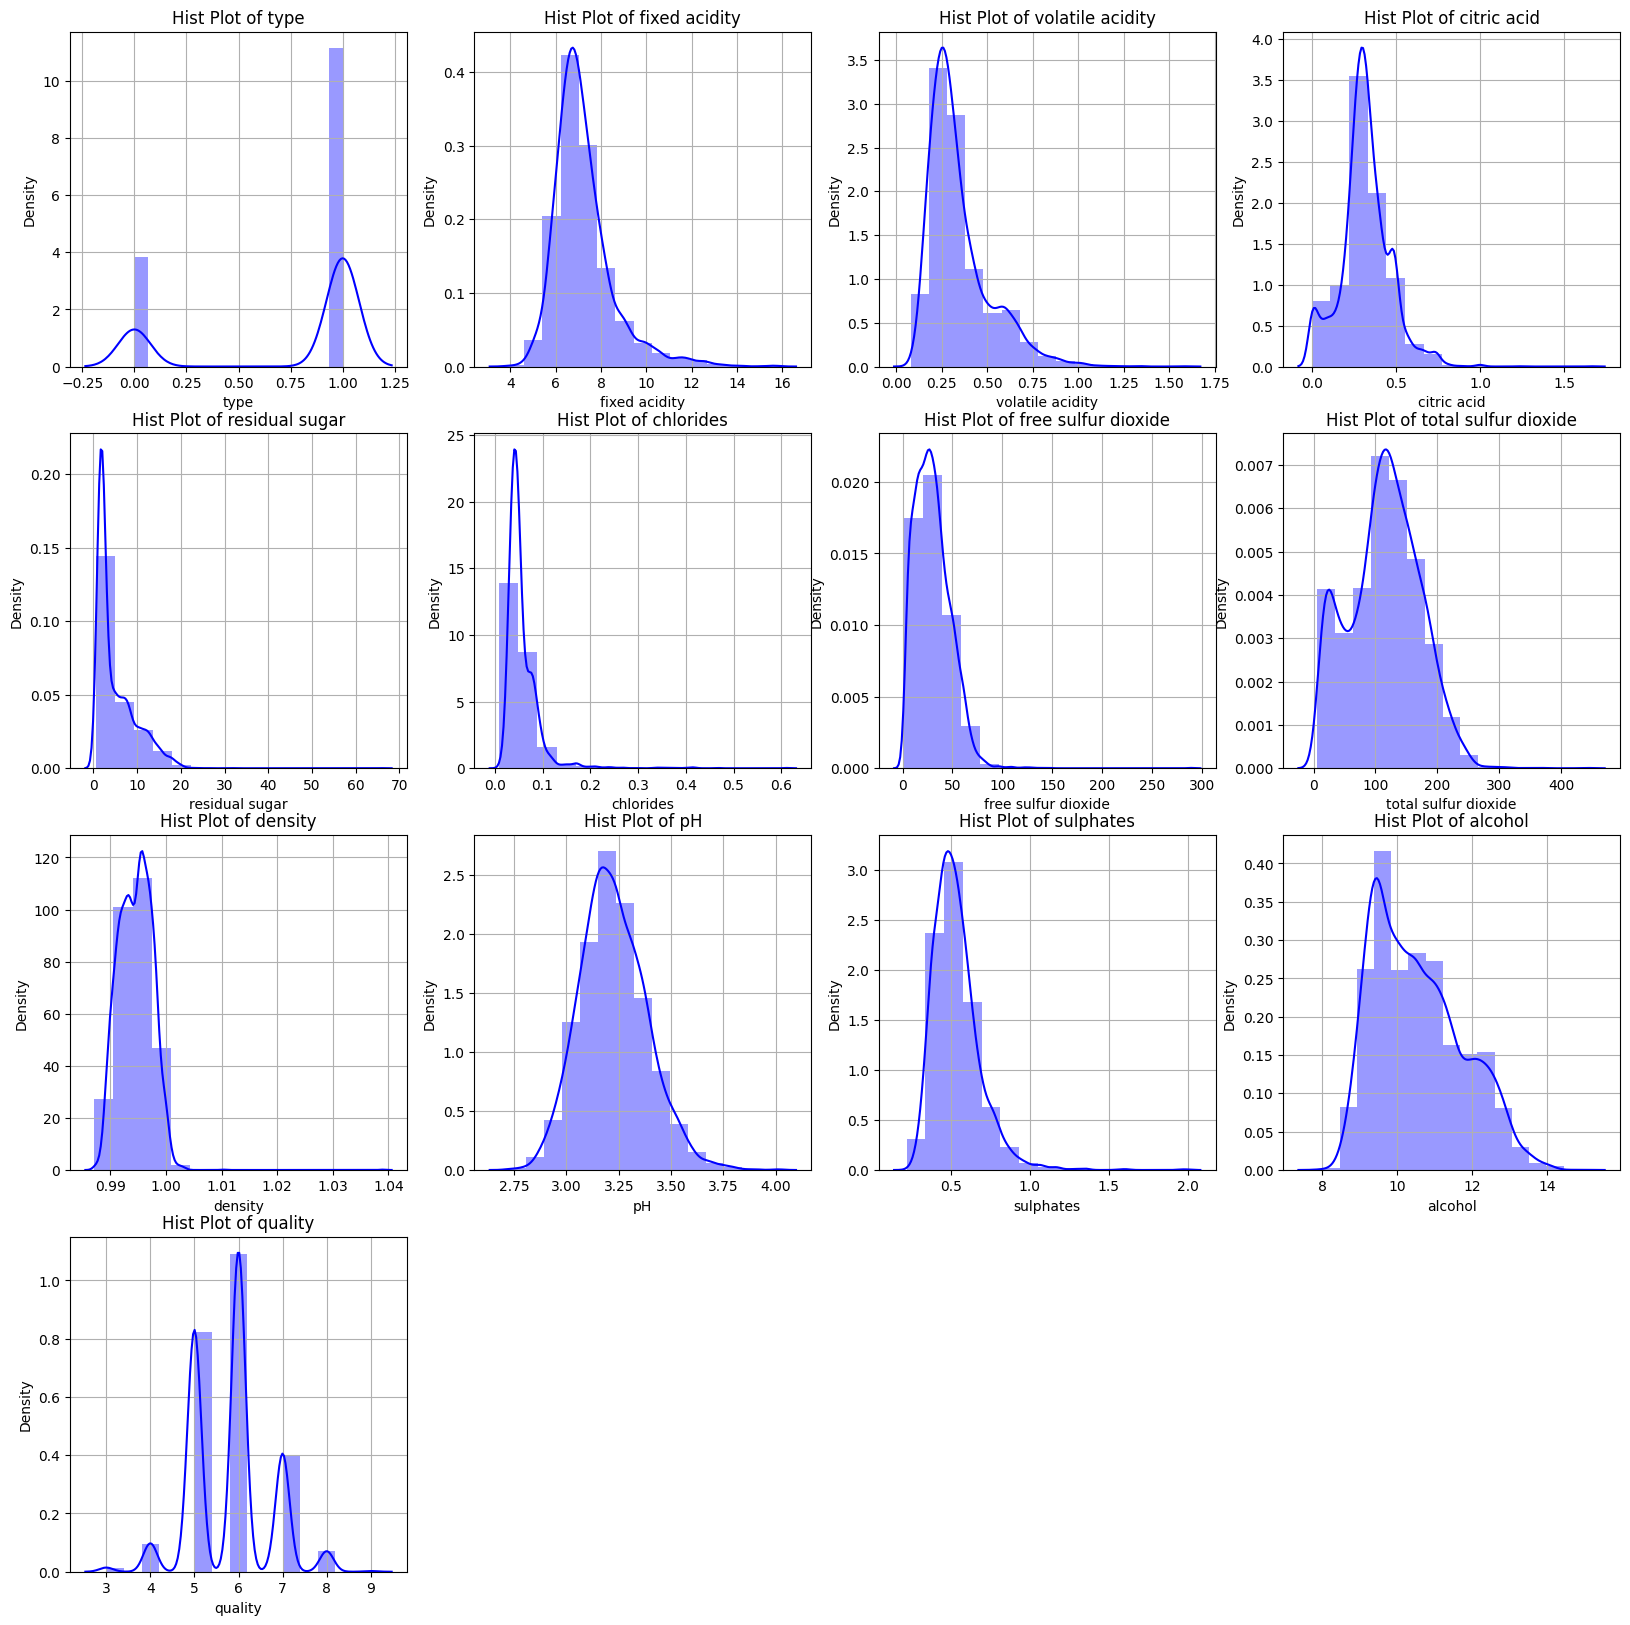

In [ ]:
## Univaraity analysis
pt.figure(figsize=(20, 20))
for i, feature in enumerate(df.columns):
    pt.subplot(4,4 ,i + 1)
    sns.distplot(df[feature],color='blue',bins=15)
    pt.grid(axis='both')
    pt.title(f'Hist Plot of {feature}')

In [ ]:
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1            7.0              0.27         0.36            20.7   
1     1            6.3              0.30         0.34             1.6   
2     1            8.1              0.28         0.40             6.9   
3     1            7.2              0.23         0.32             8.5   
6     1            6.2              0.32         0.16             7.0   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
6      0.045                 30.0                 136.0   0.9949  3.18   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
6       0.47      9.6        6

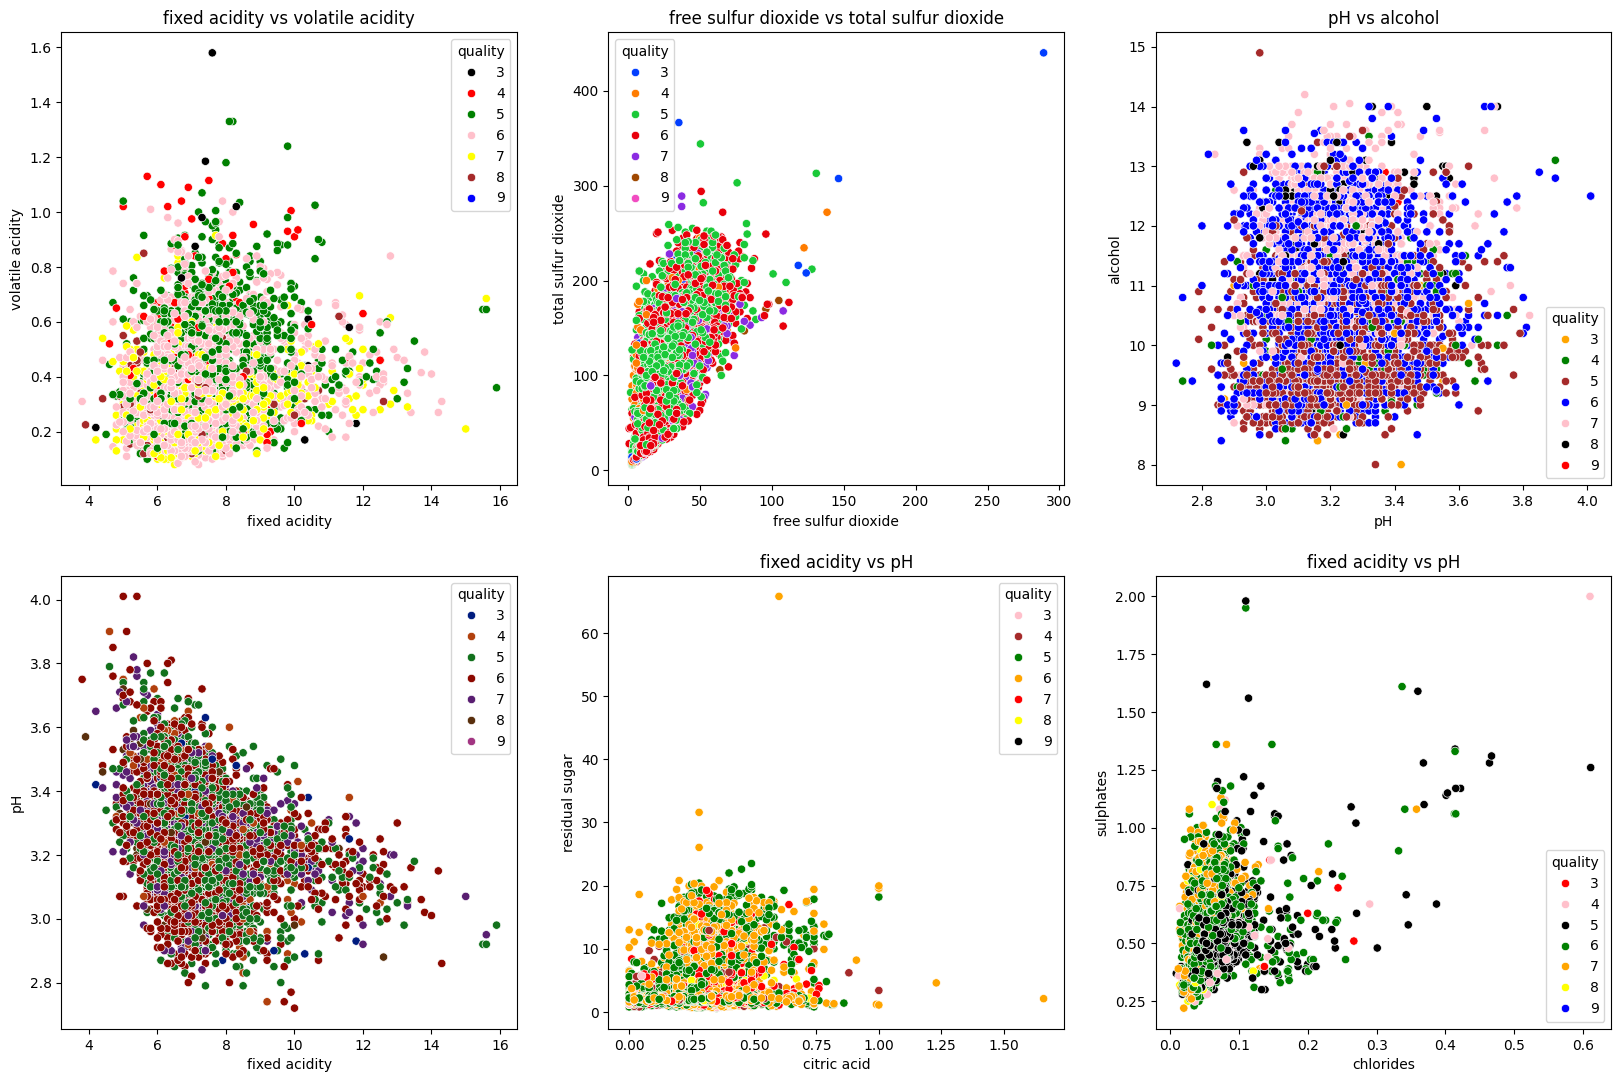

In [ ]:
## Bivariate Analysis
pt.figure(figsize=(20,20))
pt.title('Bivariat Analysis')
pt.subplot(3,3,1)
sns.scatterplot(df,x='fixed acidity',y='volatile acidity',color='g',hue='quality',palette=['black','red','green','pink','yellow','brown','blue'])
pt.title('fixed acidity vs volatile acidity')

pt.subplot(3,3,2)
sns.scatterplot(df,x='free sulfur dioxide',y='total sulfur dioxide',hue='quality',palette='bright')
pt.title('free sulfur dioxide vs total sulfur dioxide')

pt.subplot(3,3,3)
sns.scatterplot(df,x='pH',y='alcohol',hue='quality',palette=['orange','green','brown','blue','pink','black','red'])
pt.title('pH vs alcohol')

pt.subplot(3,3,4)
sns.scatterplot(df,x='fixed acidity',y='pH',hue='quality',palette='dark')


pt.subplot(3,3,5)
sns.scatterplot(df,x='citric acid',y='residual sugar',hue='quality',palette=['pink','brown','green','orange','red','yellow','black'])
pt.title('fixed acidity vs pH')

pt.subplot(3,3,6)
sns.scatterplot(df,x='chlorides',y='sulphates',hue='quality',palette=['red','pink','black','green','orange','yellow','blue'])
pt.title('fixed acidity vs pH')
pt.show()

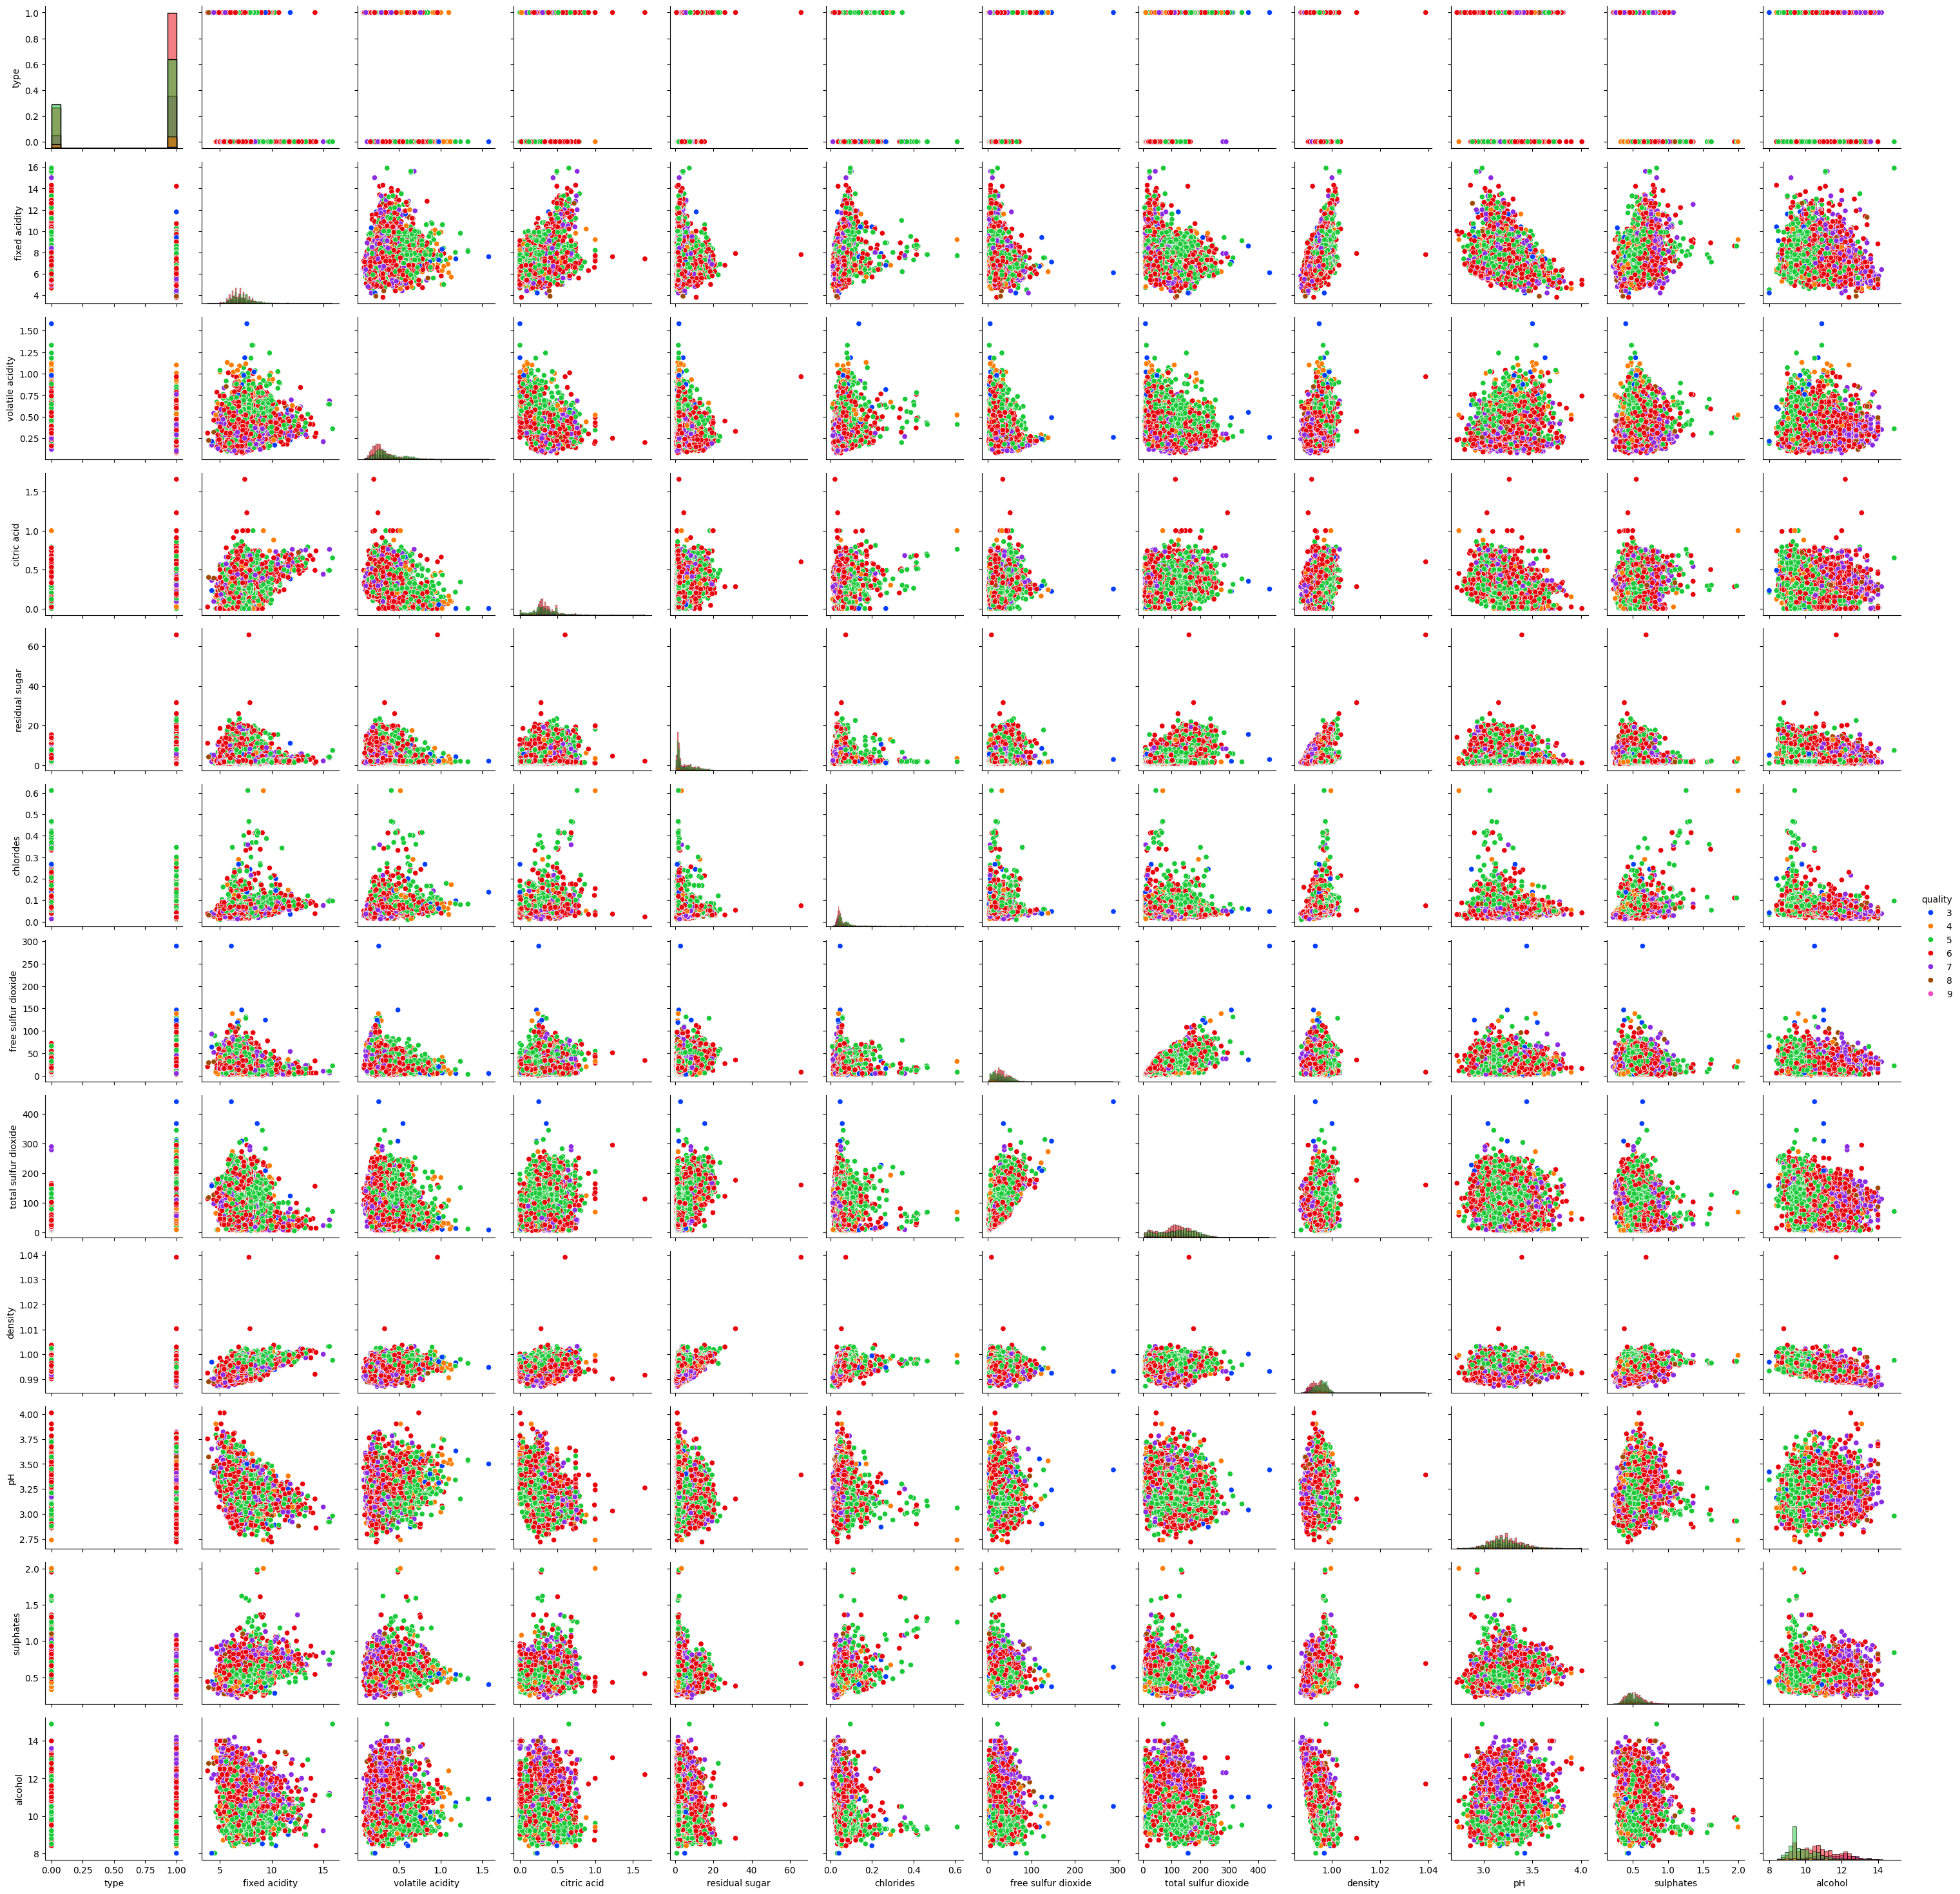

In [ ]:
g = sns.PairGrid(df, hue="quality",palette='bright')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

### Outliers

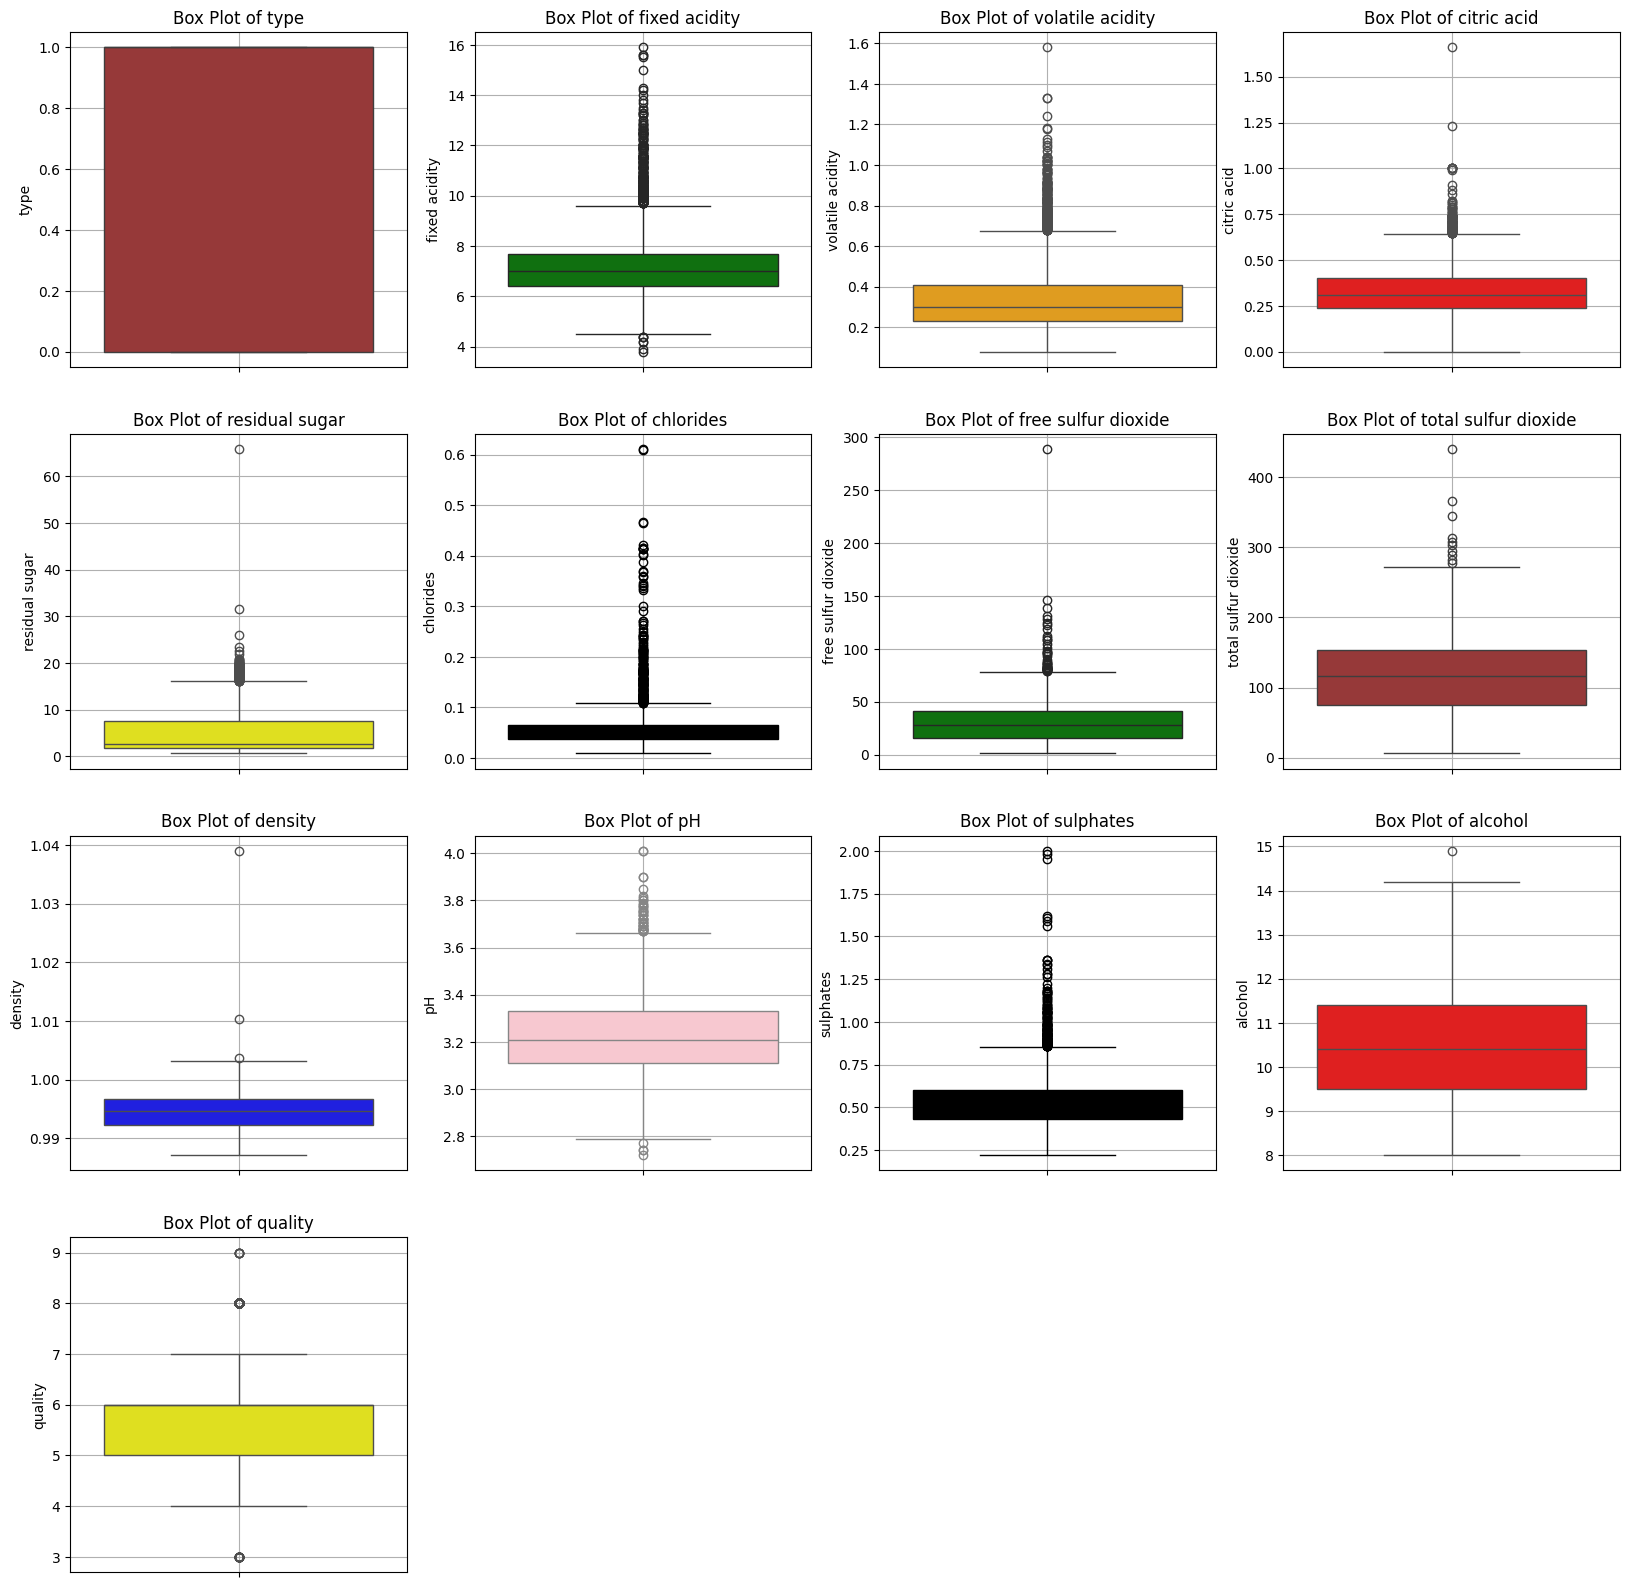

In [ ]:
pt.figure(figsize=(20, 20))
colors = ['pink','brown','green','orange','red','yellow','black','green','brown','blue','pink','black','red','yellow']
for i, feature in enumerate(df.columns):
    pt.subplot(4,4 ,i + 1)
    sns.boxplot(df[feature],color=colors[i+1])
    pt.grid(axis='both')
    pt.title(f'Box Plot of {feature}')

#### Mapping the taget output classes as Low,Medium,High Quality

##### Target column have 3,4,5,6,7,8,9 are output classes Generaizing output classes
- (3,4)   --> LOW Quality
- (5,6,7) --> MEDIUM Quality
- (8,9)   --> HIGH Quality

In [ ]:
### Mapping to output classes
df['quality'] = df['quality'].map({3:'Low',4:'Low',5:'Medium',6:'Medium',7:'Medium',8:'High',9:'High'})


In [ ]:
df['quality'] = df['quality'].map({'Low':0,'Medium':1,"High":2})

In [ ]:
df.quality.unique()

array([1, 2, 0])

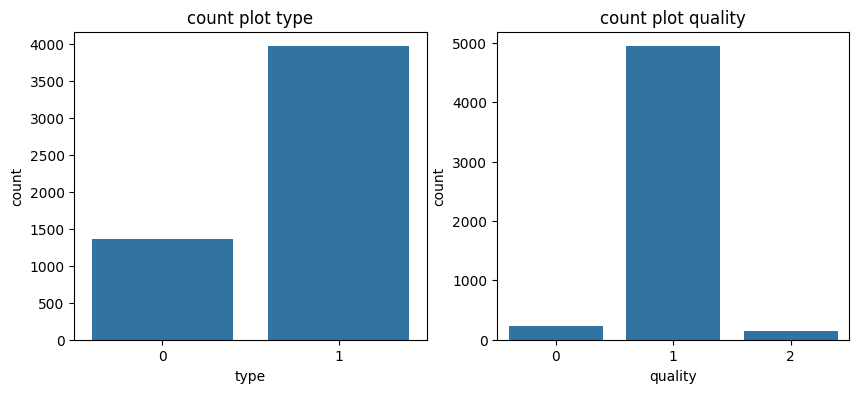

In [ ]:
## categorical feature count plot
pt.figure(figsize=(10,4))
for i,feature in enumerate(df[['type','quality']].columns):
    pt.subplot(1,2,i+1)
    sns.countplot(df,x=feature)
    pt.title('count plot '+feature)

In [ ]:
##checking the data is whether is imbalanced dataset
print('Low',len(df[df['quality']==0]))
print('Medium',len(df[df['quality']==1]))
print('High',len(df[df['quality']==2]))

Low 236
Medium 4939
High 154


In [ ]:
X = df.drop('quality',axis=1)
y = df.quality

In [ ]:
print(X.shape)
print(y.shape)

(5329, 12)
(5329,)


#### Feature Importance

In [ ]:
#### Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
feature_imp= ExtraTreesClassifier()
feature_imp.fit(X,y)
scores = feature_imp.feature_importances_
pd.DataFrame({'Feature': X.columns,'Feature_Importance': (scores*100)}).sort_values(by = 'Feature_Importance', ascending = True)

Feature  Feature_Importance
0                   type            1.003905
1          fixed acidity            8.295731
5              chlorides            8.296079
8                density            8.343805
3            citric acid            8.532197
9                     pH            8.554445
4         residual sugar            8.675128
7   total sulfur dioxide            8.721845
10             sulphates            8.849486
11               alcohol            9.371021
2       volatile acidity           10.569003
6    free sulfur dioxide           10.787356

#### Converting the Imbalanced dataset into Balanced dataset

In [ ]:
# transform the dataset in to balanced formet
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
X, y = oversample.fit_resample(X, y)

In [ ]:
print(X.shape)
print(y.shape)

(14817, 12)
(14817,)


In [ ]:
y.value_counts()

1    4939
2    4939
0    4939
Name: quality, dtype: int64

(1000.0, 5000.0)

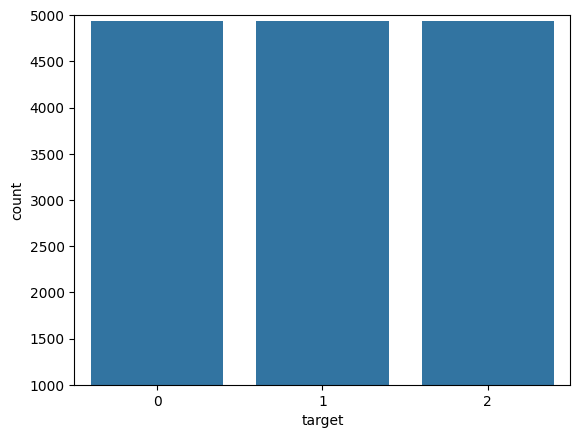

In [ ]:
### The target classes in balanced formet
y_df = pd.DataFrame(np.array(y),columns=['target'])
sns.countplot(y_df,x='target')
pt.ylim([1000,5000])

In [ ]:
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1            7.0              0.27         0.36            20.7   
1     1            6.3              0.30         0.34             1.6   
2     1            8.1              0.28         0.40             6.9   
3     1            7.2              0.23         0.32             8.5   
6     1            6.2              0.32         0.16             7.0   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
6      0.045                 30.0                 136.0   0.9949  3.18   

   sulphates  alcohol  quality  
0       0.45      8.8        1  
1       0.49      9.5        1  
2       0.44     10.1        1  
3       0.40      9.9        1  
6       0.47      9.6        1

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### Feature Scaling

#### Model Training

In [ ]:
#### Model selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

models = {'Logistic Regression':LogisticRegression(),
          'Support Vector Machine':SVC(),
          'DecsionTree':DecisionTreeClassifier(),
          'RadomForestClassier':RandomForestClassifier(),
         'AdaBosster':AdaBoostClassifier(),
          'XGBboost':XGBClassifier()}

In [ ]:
for i in range(len(models)):
    model =list(models.values())[i]
    model.fit(X_train,y_train)
    print(list(models.keys())[i]+' score: ',model.score(X_test,y_test))
    cros_score = cross_val_score(model,X_train,y_train,cv=5)
    print(list(models.keys())[i]+' Cross_Val :',list(cros_score))
    print('mean : ',np.mean(cros_score))
    print('__'*40)


Logistic Regression score:  0.6406882591093117
Logistic Regression Cross_Val : [0.6385491353859131, 0.6145086461408689, 0.6229439055250949, 0.6084388185654008, 0.6215189873417721]
mean :  0.62119189859181
________________________________________________________________________________
Support Vector Machine score:  0.6093117408906883
Support Vector Machine Cross_Val : [0.5862505272037115, 0.5925769717418811, 0.5997469422184732, 0.59957805907173, 0.5864978902953587]
mean :  0.5929300781062309
________________________________________________________________________________
DecsionTree score:  0.8947368421052632
DecsionTree Cross_Val : [0.8738928722058203, 0.8797975537747785, 0.8764234500210881, 0.8696202531645569, 0.8666666666666667]
mean :  0.8732801591665822
________________________________________________________________________________
RadomForestClassier score:  0.9659244264507423
RadomForestClassier Cross_Val : [0.9514972585407001, 0.952762547448334, 0.9565584141712358, 0.952320675

##### Here RandomForest,XGBbooster are giving more score compare to other models so I am taking XGBbooster as my final model and doing hyperparameter tuning on it

#### HYPER PARAMETER TUNNIG
##### XGBooster Tunning

In [ ]:
Xgb = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
}

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
dic = {}
grid = GridSearchCV(XGBClassifier(),param_grid=Xgb,cv=5)
grid.fit(X_train,y_train)
dic['xgb'] = grid.best_params_

In [ ]:
xgb = XGBClassifier(learning_rate=0.5,max_depth= 7,min_child_weight= 1,n_estimators=200)
xgb.fit(X_train,y_train)
xgb.score(X_test,y_test)

0.9824561403508771

In [ ]:
## freecodecamp.org is the providing cources with certificates

In [ ]:
###Test Data
y_pred = xgb.predict(X_test)

#### Model Evolution Metrics

In [ ]:
### Perfomence metrics
from sklearn.metrics import f1_score,classification_report,accuracy_score,recall_score,precision_score,confusion_matrix,auc
print('accuracy: ',accuracy_score(y_pred,y_test))
print('recall: ',recall_score(y_pred,y_test,average=None))
print('precision: ',precision_score(y_pred,y_test,average=None))
print('classification report: ',classification_report(y_pred,y_test))


accuracy:  0.9824561403508771
recall:  [0.98005982 0.97715988 0.99056604]
precision:  [0.98103792 0.97137216 0.99578504]
classification report:                precision    recall  f1-score   support

           0       0.98      0.98      0.98      1003
           1       0.97      0.98      0.97      1007
           2       1.00      0.99      0.99       954

    accuracy                           0.98      2964
   macro avg       0.98      0.98      0.98      2964
weighted avg       0.98      0.98      0.98      2964



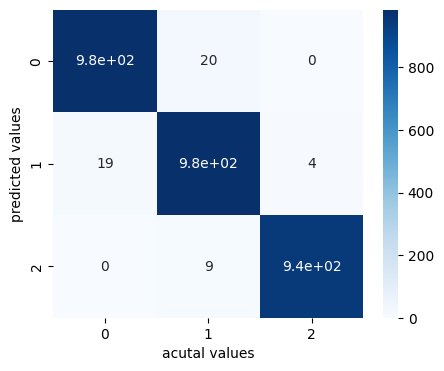

In [ ]:
##Heatmap
pt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,cmap='Blues')
pt.xlabel('acutal values')
pt.ylabel('predicted values')
pt.show()

In [ ]:
accuracy_dataframe3 = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

In [ ]:
print( 'Acutally points are incorrectly classified', sum(accuracy_dataframe3['y_test']-accuracy_dataframe3['y_pred']),'points')

Acutally points are incorrectly classified -4 points


#### pickle file

In [ ]:
###pickle file
import pickle
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)

In [ ]:
with open('model_pkl' , 'rb') as f:
    model = pickle.load(f)

In [ ]:
model.predict([[1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8]])

array([1])